In [65]:
import numpy as np
np.random.seed(42)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import pandas as pd

In [118]:
path='/content/drive/MyDrive/digits-train.data'
train=pd.read_csv(path, sep=',')
path='/content/drive/MyDrive/digits-test.data'
test=pd.read_csv(path, sep=',')
y_train=train.iloc[:,1]
y_test=test.iloc[:,1]
X_train1=train.iloc[:,1:]
X_test1=test.iloc[:,1:]
print(X_train1.shape)

(3822, 64)


In [66]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [119]:
X=X_train1.T
y1=y_train.values
y=y1.reshape((1,3822))
np.shape(y)

(1, 3822)

In [76]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [120]:
# defining the model architecture
i_neurons = X.shape[0]  # number of features in data set
h_neurons = 10  # number of hidden layers neurons
o_neurons = 1  # number of neurons at output layer

# initializing weight
wihidden = np.random.uniform(size=(i_neurons, h_neurons))
whoutput = np.random.uniform(size=(h_neurons, o_neurons))

# defining the parameters
Lr = 0.01
Epochs = 100

losses = []
for epoch in range(Epochs):
    # Forward Propogation

    # hidden layer activations
    hlinearTransform = np.dot(wihidden.T, X)
    hactivations = sigmoid(hlinearTransform)

    olinearTransform = np.dot(
        whoutput.T, hactivations
    )
    output = sigmoid(olinearTransform)

    # Backward Propagation

    # cal error
    err = np.square(y - output) / 2

    # cal rate of change of error w.r.t weight between hidden and output layer
    err_wrt_output = -(y - output)
    olt = np.multiply(output, (1 - output))
    oo1 = hactivations

    err_wrt_weights_hidden_output = np.dot(
        oo1,
        (err_wrt_output * olt).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    olth = whoutput
    hhlt = np.multiply(
        hactivations, (1 - hactivations)
    )
    hlih = X
    err_wrt_weights_input_hidden = np.dot(
        hlih,
        (
            hhlt
            * np.dot(
                olth,
                (olt * err_wrt_output),
            )
        ).T,
    )

    # update weights
    whoutput = whoutput - Lr * err_wrt_weights_hidden_output
    wihidden = wihidden - Lr * err_wrt_weights_input_hidden

    # print error at every 10th epoch
    epoch_loss = np.average(err)
    if epoch % 1 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.60536
Error at epoch 1 is 0.38369
Error at epoch 2 is 0.61685
Error at epoch 3 is 0.61000
Error at epoch 4 is 0.42830
Error at epoch 5 is 0.42111
Error at epoch 6 is 0.42111
Error at epoch 7 is 0.42111
Error at epoch 8 is 0.42111
Error at epoch 9 is 0.42111
Error at epoch 10 is 0.42111
Error at epoch 11 is 0.42111
Error at epoch 12 is 0.42111
Error at epoch 13 is 0.42111
Error at epoch 14 is 0.42111
Error at epoch 15 is 0.42111
Error at epoch 16 is 0.42111
Error at epoch 17 is 0.42111
Error at epoch 18 is 0.42111
Error at epoch 19 is 0.42111
Error at epoch 20 is 0.42111
Error at epoch 21 is 0.42111
Error at epoch 22 is 0.42111
Error at epoch 23 is 0.42111
Error at epoch 24 is 0.42111
Error at epoch 25 is 0.42111
Error at epoch 26 is 0.42111
Error at epoch 27 is 0.42111
Error at epoch 28 is 0.42111
Error at epoch 29 is 0.42111
Error at epoch 30 is 0.42111
Error at epoch 31 is 0.42111
Error at epoch 32 is 0.42111
Error at epoch 33 is 0.42111
Error at epoch 34 is 0.4

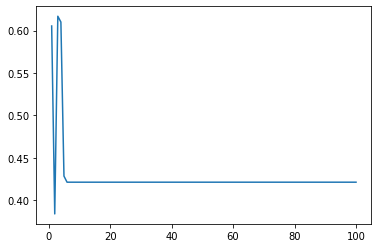

In [121]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, Epochs + 1), np.array(losses))

In [105]:
X=X_test1.T
y1=y_test.values
y=y1.reshape((1,1796))
np.shape(y)

(1, 1796)

Test Digit Data

In [106]:
hlinearTransform = np.dot(wihidden.T, X)
hactivations = sigmoid(hlinearTransform)

olinearTransform = np.dot(whoutput.T, hactivations)
output = sigmoid(olinearTransform)


err = np.average(np.square(y - output))

print(err)

0.9153674832348021


In [109]:
from sklearn import preprocessing
import pandas as pd
from keras.utils import np_utils

path='/content/drive/MyDrive/fishing1.data'
data1=pd.read_csv(path, sep=',')

print(data1)
label_encoder = preprocessing.LabelEncoder()



data=data1
y_train=data.iloc[0:13,4]

X_train1=data.iloc[0:13,0:4]
X_train1['Strong'] = label_encoder.fit_transform(X_train1['Strong'])
X_train1['Warm'] = label_encoder.fit_transform(X_train1['Warm'])
X_train1['Warm.1'] = label_encoder.fit_transform(X_train1['Warm.1'])
X_train1['Sunny'] = label_encoder.fit_transform(X_train1['Sunny'])
y_train = label_encoder.fit_transform(y_train)
X_test1=data.iloc[14:17,0:4]
X_test1['Strong'] = label_encoder.fit_transform(X_test1['Strong'])
X_test1['Warm'] = label_encoder.fit_transform(X_test1['Warm'])
X_test1['Warm.1'] = label_encoder.fit_transform(X_test1['Warm.1'])
X_test1['Sunny'] = label_encoder.fit_transform(X_test1['Sunny'])
print(X_train1.shape)
print(X_test1.shape)
# Y_train = np_utils.to_categorical(y_train, 2)

       Strong  Warm    Warm.1   Sunny  Yes
0        Weak  Warm      Warm   Sunny   No
1      Strong  Warm      Warm  Cloudy  Yes
2      Strong  Warm  Moderate   Rainy  Yes
3      Strong  Cold      Cold   Rainy   No
4        Weak  Cold      Cold   Rainy   No
5        Weak  Cold      Cold   Sunny   No
6      Strong  Warm  Moderate   Sunny  Yes
7      Strong  Cold      Cold   Sunny  Yes
8      Strong  Cold  Moderate   Rainy   No
9        Weak  Cold  Moderate   Sunny  Yes
10       Weak  Warm  Moderate   Sunny  Yes
11     Strong  Cold      Warm   Sunny  Yes
12       Weak  Warm  Moderate   Rainy   No
13  Test Data   NaN       NaN     NaN  NaN
14     Strong  Warm      Cold   Sunny    ?
15      Light  Cold      Warm   Rainy    ?
(13, 4)
(2, 4)


In [112]:
X=X_train1.T
y1=y_train
y=y1.reshape((1,13))
np.shape(y)

(1, 13)

In [113]:
# defining the model architecture
i_neurons = X.shape[0]  # number of features in data set
h_neurons = 10  # number of hidden layers neurons
o_neurons = 1  # number of neurons at output layer

# initializing weight
wihidden = np.random.uniform(size=(i_neurons, h_neurons))
whoutput = np.random.uniform(size=(h_neurons, o_neurons))

# defining the parameters
Lr = 0.01
Epochs = 100

losses = []
for epoch in range(Epochs):
    # Forward Propogation

    # hidden layer activations
    hlinearTransform = np.dot(wihidden.T, X)
    hactivations = sigmoid(hlinearTransform)

    olinearTransform = np.dot(
        whoutput.T, hactivations
    )
    output = sigmoid(olinearTransform)

    # Backward Propagation

    # cal error
    err = np.square(y - output) / 2

    # cal rate of change of error w.r.t weight between hidden and output layer
    err_wrt_output = -(y - output)
    olt = np.multiply(output, (1 - output))
    oo1 = hactivations

    err_wrt_weights_hidden_output = np.dot(
        oo1,
        (err_wrt_output * olt).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    olth = whoutput
    hhlt = np.multiply(
        hactivations, (1 - hactivations)
    )
    hlih = X
    err_wrt_weights_input_hidden = np.dot(
        hlih,
        (
            hhlt
            * np.dot(
                olth,
                (olt * err_wrt_output),
            )
        ).T,
    )

    # update weights
    whoutput = whoutput - Lr * err_wrt_weights_hidden_output
    wihidden = wihidden - Lr * err_wrt_weights_input_hidden

    # print error at every 10th epoch
    epoch_loss = np.average(err)
    if epoch % 1 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.22603
Error at epoch 1 is 0.22601
Error at epoch 2 is 0.22600
Error at epoch 3 is 0.22598
Error at epoch 4 is 0.22597
Error at epoch 5 is 0.22595
Error at epoch 6 is 0.22594
Error at epoch 7 is 0.22593
Error at epoch 8 is 0.22591
Error at epoch 9 is 0.22590
Error at epoch 10 is 0.22588
Error at epoch 11 is 0.22587
Error at epoch 12 is 0.22585
Error at epoch 13 is 0.22584
Error at epoch 14 is 0.22582
Error at epoch 15 is 0.22580
Error at epoch 16 is 0.22579
Error at epoch 17 is 0.22577
Error at epoch 18 is 0.22576
Error at epoch 19 is 0.22574
Error at epoch 20 is 0.22573
Error at epoch 21 is 0.22571
Error at epoch 22 is 0.22569
Error at epoch 23 is 0.22568
Error at epoch 24 is 0.22566
Error at epoch 25 is 0.22565
Error at epoch 26 is 0.22563
Error at epoch 27 is 0.22561
Error at epoch 28 is 0.22560
Error at epoch 29 is 0.22558
Error at epoch 30 is 0.22556
Error at epoch 31 is 0.22554
Error at epoch 32 is 0.22553
Error at epoch 33 is 0.22551
Error at epoch 34 is 0.2

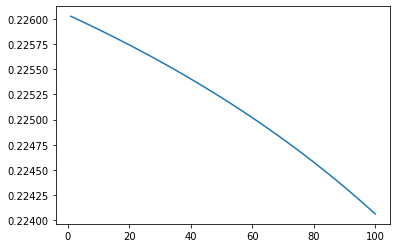

In [114]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, Epochs + 1), np.array(losses))

In [115]:
X = X_test1.T
hlinearTransform = np.dot(wihidden.T, X)
hactivations = sigmoid(hlinearTransform)

olinearTransform = np.dot(whoutput.T, hactivations)
output = sigmoid(olinearTransform)


# err = np.average(np.square(y - output))

print(output)

[[0.99020522 0.97286386]]
